## running a simulation of 'searching'. using agents where each agent chooses numbers randomly and tries to guess the right number (which is randomly assigned at the begining). There are three types of agents:
* dumb - just searches randomly every single time, has no memory
* smart - (actually just not dumb) chooses randomly but each agent remembers (and avoids) its past choices
* collab - the agents collaborate so the previous failed guesses are known globally

In [1]:
from random import randrange, choice
from collections import namedtuple
import numpy as np
from threading import Thread

# w/ and w/o collaboration, agent class, experiment
class experiment():
    def __init__(self, size, num_agent, run_type='dumb'):
        self.hat = [False for i in range(size)]
        self.agents = [agent(i) for i in range(num_agent)]
        rand = randrange(0, size)
        self.hat[rand] = True
        self.run_type = run_type
        self.exclude = []
#         print("True ind",rand)
        
    def __repr__(self):
        return 'size is {}, here it is {}, agents are {}'.format(len(self.hat), self.hat, self.agents)
    
    def agent_choice(self, agent):
        if self.run_type == 'dumb':
            num = agent.choose(self.hat)
        elif self.run_type == 'smart':
            num = agent.smart_choose(self.hat)
        elif self.run_type == 'collab':
            filtered = [r for r in range(len(self.hat)) if r not in self.exclude]
            if filtered:
                num = agent.collab_choose(filtered)
                self.exclude.append(num)
            else:
                num = None
#         print(agent, num)
        return num
    
    def run_agents(self):
        nums = [self.agent_choice(agent) for agent in self.agents]
        return nums
    
    def run_exp(self):
        while True:
            nums = self.run_agents()
            stop = False
#             outcomes = [self.hat[num] for num in nums]
            for num in nums:
                if self.hat[num] == True:
                    stop = True
                    break
            if stop:
                break
        self.post_run()
        
    def post_run(self):
        post = namedtuple('post', ['counters', 'hat'])
        counters = [agent.counter for agent in self.agents]
        return post(counters, self.hat)
    
class agent():
    def __init__(self, ind):
        self.ind = ind
        self.counter = 0
        self.chosen = []
        
    def __repr__(self):
        return "Agent {} is at move {}".format(self.ind, self.counter)
        
    def choose(self, hat):
        self.counter += 1
        return randrange(0, len(hat))
    
    def smart_choose(self, hat):
        self.counter += 1
        rand = choice([r for r in range(len(hat)) if r not in self.chosen])
        self.chosen.append(rand)
        return rand
    def collab_choose(self, minihat):
        self.counter += 1
        rand = choice(minihat)
        return rand


def simulate(size, num_agent, run_type, num_exp):
    lengths = []
    for i in range(num_exp):
        exp = experiment(size, num_agent, run_type)
        exp.run_exp()
        counters, hat = exp.post_run()
#         print(counters[0])
        lengths.append(counters[0])
    return lengths

In [3]:
exp = experiment(30, 1, run_type='dumb')
exp.run_exp()
exp.post_run()

post(counters=[3], hat=[False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False])

In [12]:
nums = []
means = []
stds = []
maxs = []
mins = []
for num in range(1, 11):
    print('running over {} number of agents'.format(num))
    lengths = np.array(simulate(size=100, num_agent=num, run_type='dumb', num_exp=1000000))
    nums.append(num)
    means.append(lengths.mean())
    stds.append(lengths.std())
    maxs.append(lengths.max())
    mins.append(lengths.min())
print(lengths.mean(), lengths.std(), lengths.min(), lengths.max())
print(lengths)
print([(n, m, s, mx, mn) for n, m, s, mx, mn in zip(nums, means, stds, maxs, mins)])

running over 1 number of agents
running over 2 number of agents
running over 3 number of agents
running over 4 number of agents
running over 5 number of agents
running over 6 number of agents
running over 7 number of agents
running over 8 number of agents
running over 9 number of agents
running over 10 number of agents
10.484332 9.96439212967 1 143
[29  5  4 ...,  4  6  4]
[(1, 100.207793, 99.664090700056818, 1518, 1), (2, 50.295290999999999, 49.860090415334376, 732, 1), (3, 33.674326000000001, 33.176908060362166, 450, 1), (4, 25.365867999999999, 24.847883543806621, 328, 1), (5, 20.401907000000001, 19.905648941025536, 309, 1), (6, 17.085574000000001, 16.583794110230748, 222, 1), (7, 14.696687000000001, 14.185523121268071, 223, 1), (8, 12.949626, 12.426016435693459, 173, 1), (9, 11.569376999999999, 11.041642306825146, 150, 1), (10, 10.484332, 9.9643921296673188, 143, 1)]


11.104219907314516

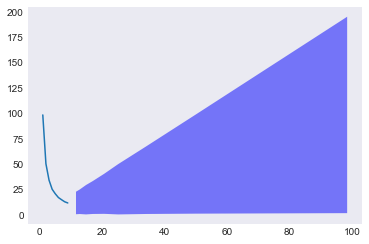

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111)
means = np.array(means)
ax.plot(nums, means)
low = [mean - std for mean, std in zip(means, stds)]
low = np.array(low)
high = [mean + std for mean, std in zip(means, stds)]
high = np.array(high)
ax.fill_between(means, low, high, facecolor='blue', alpha = 0.5);
# this doesn't plot as it should, don't know why

In [ ]:
smartnums = []
smartmeans = []
for num in range(1, 11):
    print('running over {} number of agents'.format(num))
    lengths = np.array(simulate(size=100, num_agent=num, run_type='smart', num_exp=1000000))
    smartnums.append(num)
    smartmeans.append(lengths.mean())
print([(n, m) for n, m in zip(smartnums, smartmeans)])

running over 1 number of agents
running over 2 number of agents
running over 3 number of agents
running over 4 number of agents
running over 5 number of agents
running over 6 number of agents
running over 7 number of agents
running over 8 number of agents


In [ ]:
collabnums = []
collabmeans = []
for num in range(1, 11):
    print('running over {} number of agents'.format(num))
    lengths = np.array(simulate(size=100, num_agent=num, run_type='collab', num_exp=1000000))
    collabnums.append(num)
    collabmeans.append(lengths.mean())
print([(n, m) for n, m in zip(collabnums, collabmeans)])

running over 1 number of agents
running over 2 number of agents
running over 3 number of agents
running over 4 number of agents
running over 5 number of agents
running over 6 number of agents
running over 7 number of agents
running over 8 number of agents
running over 9 number of agents
running over 10 number of agents


In [20]:
import json
with open('million_sim.json', 'w') as fo:
    json.dump((nums, means, smartnums, smartmeans, collabnums, collabmeans), fo)

In [3]:
import json
with open('million_sim.json', 'r') as fo:
    nums, means, smartnums, smartmeans, collabnums, collabmeans = json.load(fo)

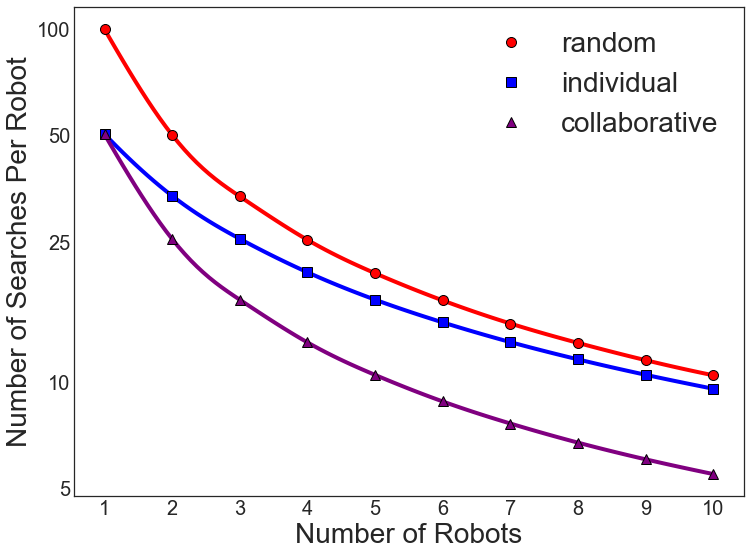

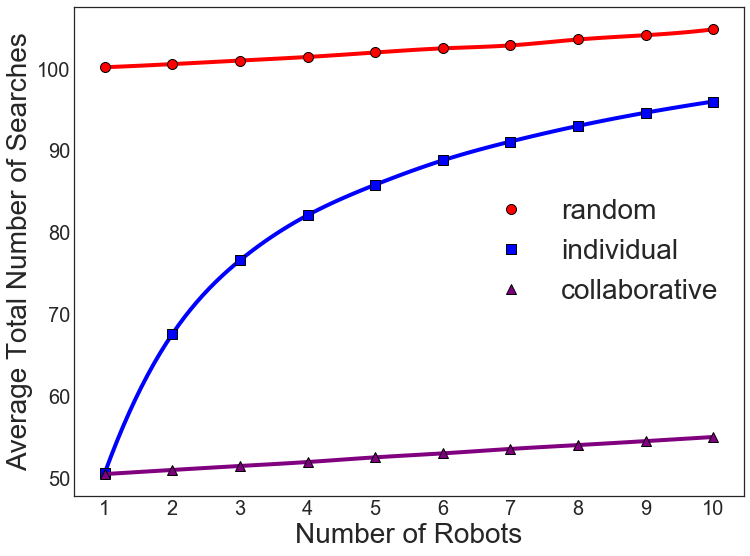

In [5]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import interpolate
import matplotlib.ticker
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 12 / 4 * 3)
plt.style.use('seaborn-white')
size = 28
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.set_yticks([5, 10, 25,50,100])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
tck = interpolate.splrep(nums, means, s=0)
x = np.linspace(start=1, stop=max(nums), num=len(nums) * 10)
plt.plot(x, interpolate.splev(x, tck, der=0), color='r', linewidth=4)
plt.plot(nums, (means), linewidth=0, marker='o', markersize=10, label='random', markerfacecolor='r', markeredgecolor='k')
tck = interpolate.splrep(smartnums, smartmeans, s=0)
x = np.linspace(start=1, stop=max(smartnums), num=len(smartnums) * 10)
plt.plot(x, interpolate.splev(x, tck, der=0), color='b', linewidth=4)
plt.plot(smartnums, smartmeans, linewidth=0, marker='s', markersize=10, label='individual', markerfacecolor='b', markeredgecolor='k')
tck = interpolate.splrep(collabnums, collabmeans, s=0)
x = np.linspace(start=1, stop=max(collabnums), num=len(collabnums) * 10)
plt.plot(x, interpolate.splev(x, tck, der=0), color='purple', linewidth=4)
plt.plot(collabnums, collabmeans, linewidth=0, marker='^', markersize=10, label='collaborative', markerfacecolor='purple', markeredgecolor='k')
plt.ylabel("Number of Searches Per Robot", fontsize=size)

# plt.fill_between(nums, np.add(means, stds), np.subtract(means, stds), alpha=0.5)

# ax = fig.add_subplot(111)
# tck = interpolate.splrep(nums, np.log(means), s=0)
# x = np.linspace(start=1, stop=max(nums), num=len(nums) * 10)
# plt.plot(x, interpolate.splev(x, tck, der=0), color='r', linewidth=4)
# plt.plot(nums, np.log(means), linewidth=0, marker='o', markersize=10, label='random')
# tck = interpolate.splrep(smartnums, np.log(smartmeans), s=0)
# x = np.linspace(start=1, stop=max(smartnums), num=len(smartnums) * 10)
# plt.plot(x, interpolate.splev(x, tck, der=0), color='b', linewidth=4)
# plt.plot(smartnums, np.log(smartmeans), linewidth=0, marker='o', markersize=10, label='individual')
# tck = interpolate.splrep(collabnums, np.log(collabmeans), s=0)
# x = np.linspace(start=1, stop=max(collabnums), num=len(collabnums) * 10)
# plt.plot(x, interpolate.splev(x, tck, der=0), color='purple', linewidth=4)
# plt.plot(collabnums, np.log(collabmeans), linewidth=0, marker='o', markersize=10, label='collaborative')
# plt.ylabel("Log Number of cycles (overall time)", fontsize=size)
# plt.title('Number of cycles vs. number of robots')
plt.legend(loc='upper right', fontsize=size)
plt.xlabel("Number of Robots", fontsize=size)
plt.xticks([x for x in range(1,11)])
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('rounds.png', format='png', dpi=800, edgecolor='W', facecolor='W', bbox_inches='tight')

randomy = [(m[0] * m[1]) for m in zip(nums, means)]
smarty = [(m[0] * m[1]) for m in zip(nums, smartmeans)]
collaby= [(m[0] * m[1]) for m in zip(nums, collabmeans)]
fig = plt.figure()
ax = fig.add_subplot(111)
tck = interpolate.splrep(nums, randomy, s=0)
x = np.linspace(start=1, stop=max(nums), num=len(nums) * 10)
plt.plot(x, interpolate.splev(x, tck, der=0), color='r', linewidth=4)
plt.plot(nums, randomy, linewidth=0, label='random', marker='o', markersize=10, markerfacecolor='r', markeredgecolor='k')
tck = interpolate.splrep(nums, smarty, s=0)
x = np.linspace(start=1, stop=max(nums), num=len(nums) * 10)
plt.plot(x, interpolate.splev(x, tck, der=0), color='b', linewidth=4)
plt.plot(smartnums, smarty, linewidth=0, label='individual', marker='s', markersize=10, markerfacecolor='b', markeredgecolor='k')
tck = interpolate.splrep(nums, collaby, s=0)
x = np.linspace(start=1, stop=max(nums), num=len(nums) * 10)
plt.plot(x, interpolate.splev(x, tck, der=0), color='purple', linewidth=4)
plt.plot(collabnums, collaby, linewidth=0, label='collaborative', marker='^', markersize=10, markerfacecolor='purple', markeredgecolor='k')
# plt.title('Number of  attempts vs. number of robots')
plt.legend(loc='center right', fontsize=size)
plt.xlabel("Number of Robots", fontsize=size)
plt.ylabel("Average Total Number of Searches", fontsize=size)
plt.xticks([x for x in range(1,11)])
plt.tick_params(axis='both', which='major', labelsize=20)
# print(plt.style.available)
plt.savefig('actions.png', format='png', dpi=800, edgecolor='W', facecolor='W', bbox_inches='tight')

* The number of cycles goes down w/ the number of agents since for all it's likelier to win
* for the number of actions it doesn't matter who many agents there are, they are dumb so it will always cost the same number of actions (the agents don't matter)
* for the smart agents the 1 agent case does it in half the time and additional agents add to the actions since with more agents there are more wasted actions, repeats of misses since they don't communicate, more agents more misses
* for collaborative strategy there is only a mild waste the increases w/ number of agents since the repeatition of missed guesses can only happen in the last step (since they all work in parallel one agent gets it and the rest wasted their move)

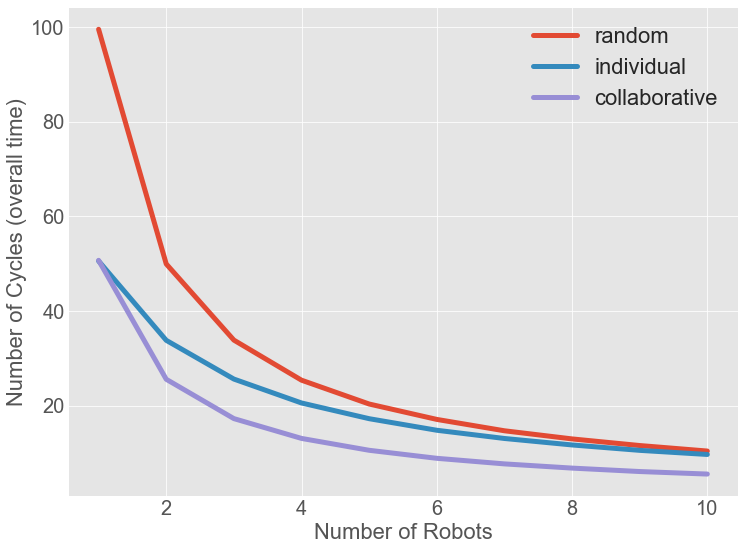

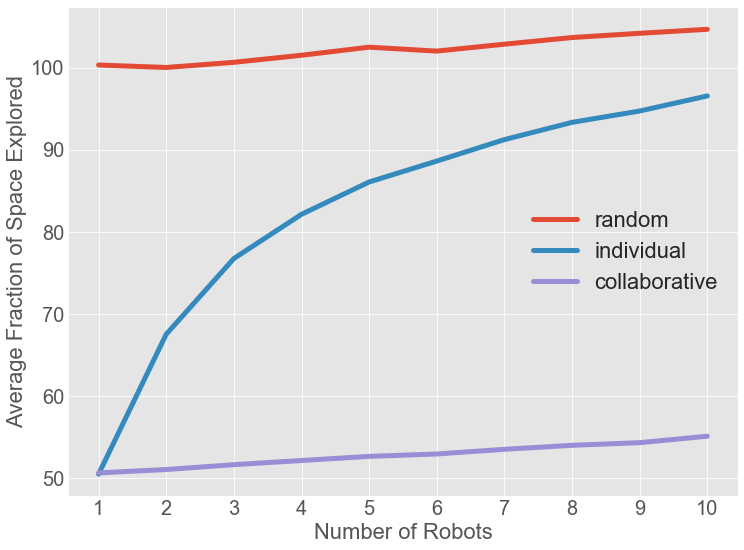

In [69]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 12 / 4 * 3)
plt.style.use('ggplot')
means = [100.30672, 100.01044, 100.63662, 101.49664, 102.4793, 102.0036, 102.84344, 103.65344, 104.16744, 104.6546]
cycles = [99.4975, 49.91078, 33.8209, 25.35162, 20.31506, 17.06222, 14.66036, 12.94078, 11.54244, 10.37734]

smartmeans = [50.53344, 67.5522, 76.76382, 82.14104, 86.0781, 88.62036, 91.23254, 93.33088, 94.71258, 96.5466]
smartcycles = [50.53344, 33.7761, 25.58794, 20.53526, 17.21562, 14.77006, 13.03322, 11.66636, 10.52362, 9.65466]

collabmeans = [50.67442, 51.08692, 51.67438, 52.18248, 52.6884, 52.97504, 53.54722, 54.03152, 54.35404, 55.1376]
collabcycles = [50.67442, 25.54346, 17.23158, 13.04562, 10.53768, 8.84292, 7.66336, 6.77364, 6.04764, 5.51376]
nums = [i for i in range(1, len(means) + 1)]
size = 22
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(nums, cycles, linewidth=5)
plt.plot(nums, smartcycles, linewidth=5)
plt.plot(nums, collabcycles, linewidth=5)
# plt.title('Number of cycles vs. number of robots')
plt.legend(['random', 'individual', 'collaborative'], loc='upper right', fontsize=size)
plt.xlabel("Number of Robots", fontsize=size)
plt.ylabel("Number of Cycles (overall time)", fontsize=size)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.savefig('rounds.png', format='png', dpi=300, edgecolor='W', facecolor='W', bbox_inches='tight')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(nums, means, linewidth=5)
# plt.fill_between(nums, np.add(means, stds), np.subtract(means, stds), alpha=0.5)
plt.plot(nums, smartmeans, linewidth=5)
plt.plot(nums, collabmeans, linewidth=5)
# plt.title('Number of  attempts vs. number of robots')
plt.legend(['random', 'individual', 'collaborative'], loc='center right', fontsize=size)
plt.xlabel("Number of Robots", fontsize=size)
plt.ylabel("Average Percent of Space Explored", fontsize=size)
plt.xticks([x for x in range(1,11)])
plt.tick_params(axis='both', which='major', labelsize=20)
# print(plt.style.available)
plt.savefig('actions.png', format='png', dpi=300, edgecolor='W', facecolor='W', bbox_inches='tight')